<a href="https://colab.research.google.com/github/Annisa123791/analisis-data-python/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Annisa Saninah
- **Email:** saninahannisa@gmail.com
- **ID Dicoding:** annisa1212

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pada jam berapa peminjaman sepeda paling tinggi dalam sehari
- Bagaimana tren peminjaman sepeda berdasarkan hari dalam seminggu?
- Bagaimana hubungan antara suhu dengan jumlah peminjaman sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda? Apakah terdapat kondisi cuaca tertentu yang menyebabkan penurunan drastis dalam peminjaman?

## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hour.csv

**Load tabel hour**

In [2]:
hour = pd.read_csv("/content/hour.csv")
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
### Memuat Data = Dataset ini berisi informasi peminjaman sepeda dalam satuan jam yang lebih detail


**Load tabel day**

In [3]:
day = pd.read_csv("/content/day.csv")
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
### Memuat Data = Dataset ini berisi informasi peminjaman sepeda dalam satuan jam yang lebih detail

### Assessing Data

**Digunakan untuk menggabungkan dataset harian day.csv dengan dataset per jam hour.csv**

In [4]:
bike_sharing = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing.shape)
bike_sharing.loc[bike_sharing["dteday"].isnull()]
bike_sharing.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengecek tipe data day_df

In [5]:
day.info()
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

### Cleaning Data

Mengecek apakah ada missing values

In [6]:
bike_sharing.isnull().sum()

,0
instant_daily,0
dteday,0
season_daily,0
yr_daily,0
mnth_daily,0
holiday_daily,0
weekday_daily,0
workingday_daily,0
weathersit_daily,0
temp_daily,0


**Insight:**
- tabel day_df tidak ada missing values

Mengecek apakah ada duplicate data

In [7]:
bike_sharing.duplicated().sum()

0

Mengecek apakah terdapat keanehan pada nilai statistiknya

**Insight:**
- Pada tabel day_df terdapat 0 data yang double

In [8]:
bike_sharing.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada keanehan pada nilai statistiknya

## Exploratory Data Analysis (EDA)

In [9]:
bike_sharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

In [10]:
bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

**Insight:**
- untuk mengelompokkan data berdasarkan musim
- menghitung berbagai statistik terkait hari kerja dan kecepatan angin


In [11]:
bike_sharing.groupby(by="season_daily").agg({
    "workingday_daily": "count",
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily windspeed_daily                               
                        count             max       min      mean <lambda_0>
season_daily                                                                
3                        4496        0.375617  0.064071  0.171593   0.311546
2                        4409        0.388067  0.065929  0.203410   0.322138
1                        4242        0.507463  0.045408  0.215107   0.462055
4                        4232        0.422275  0.022392  0.170819   0.399883

**Insight:**
- untuk menganalisis tren peminjaman sepeda berdasarkan musim  dengan menghitung jumlah hari kerja serta statistik kecepatan angin

In [12]:
numerical_columns = ["holiday_daily"
 ,"weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = bike_sharing[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

**Insight:**
- digunakan untuk menganalisis korelasi antar variabel numerik dalam dataset bike_sharing





## Visualization & Explanatory Analysis

### Pertanyaan 1: **Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?**

<ipython-input-13-076085283a2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day, estimator=sum, palette='coolwarm')


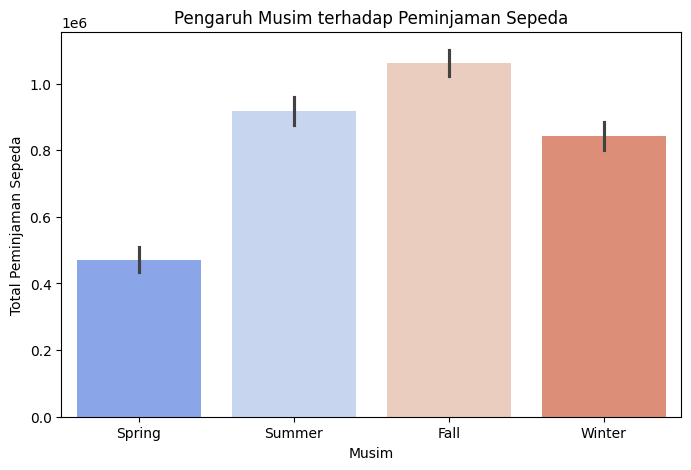

In [13]:
# Visualisasi 1 : Pengaruh musim terhadap jumlah peminjaman sepeda
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=day, estimator=sum, palette='coolwarm')
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

**Insight:**
- Membantu dalam Pengambilan Keputusan

Jika peminjaman sangat rendah pada musim dingin, maka perusahaan bisa mempertimbangkan diskon atau strategi pemasaran khusus. Dan jika peminjaman tetap stabil di semua musim, maka fokus bisa dialihkan ke faktor lain, seperti harga atau promosi.


### Pertanyaan 2 : Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?

<ipython-input-14-809c091dfb5d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour, estimator=sum, ci=None, marker="o", color="b")


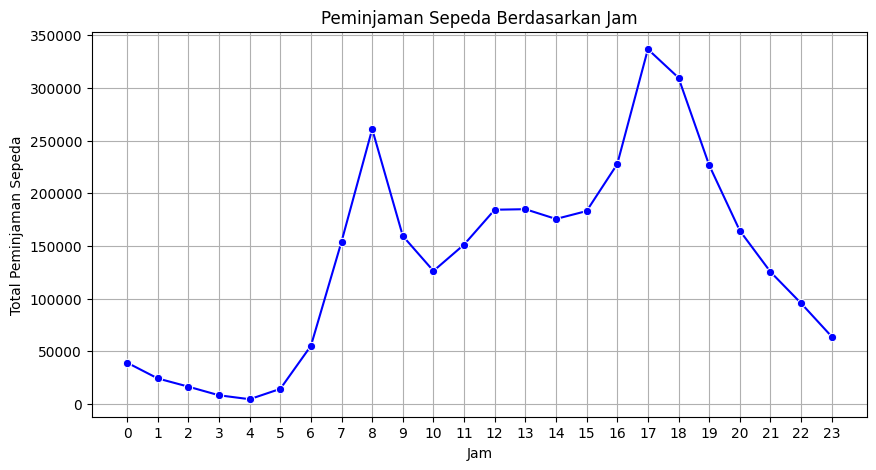

In [14]:
# Visualisasi 2: Pola peminjaman sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=hour, estimator=sum, ci=None, marker="o", color="b")
plt.xlabel("Jam")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Meningkatkan Efisiensi Operasional

Dengan mengetahui pola peminjaman berdasarkan jam, penjadwalan perawatan sepeda bisa dioptimalkan pada jam-jam sepi. Lalu,
Operator bisa mengatur jumlah sepeda yang siap digunakan di lokasi tertentu berdasarkan jam sibuk.


### Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

<ipython-input-15-f9eb6367bbb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day, palette='Set2')


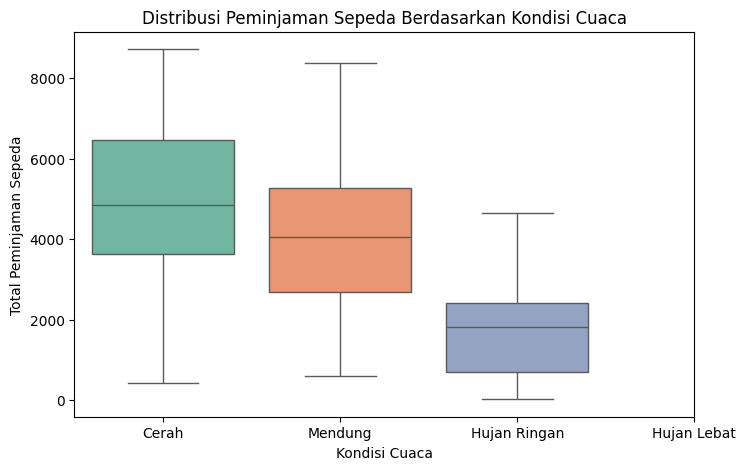

In [15]:
# Visualisasi 3 : Boxplot peminjaman sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=day, palette='Set2')
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.show()

**Insight:**
- Bisa Digunakan untuk Prediksi Permintaan Sepeda

Dengan memahami hubungan antara cuaca dan peminjaman sepeda, maka prediksi permintaan berdasarkan prakiraan cuaca bisa dilakukan.

### Pertanyaan 4 : Bagaimana distribusi jumlah peminjaman sepeda harian?



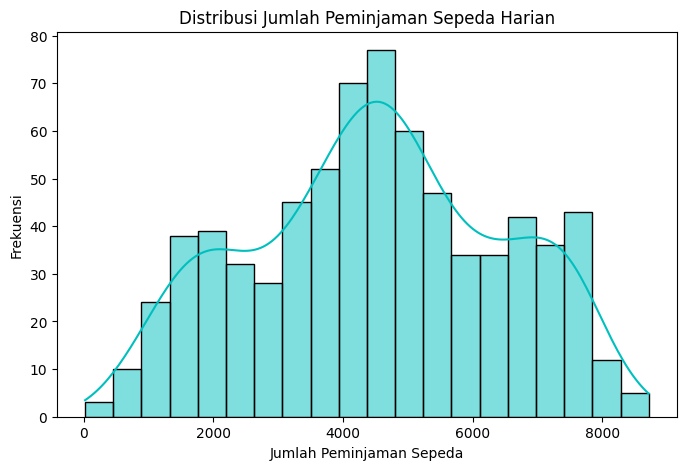

In [16]:
# Visualisasi 4 : Histogram distribusi jumlah peminjaman sepeda harian
plt.figure(figsize=(8,5))
sns.histplot(day['cnt'], bins=20, kde=True, color='c')
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Peminjaman Sepeda Harian")
plt.show()

**Insight:**
- Memahami Pola Permintaan Sepeda

Dengan melihat distribusi peminjaman, maka kita bisa mengetahui apakah jumlah peminjaman sepeda harian lebih sering tinggi, rendah, atau merata.

### Pertanyaan 5 : Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?



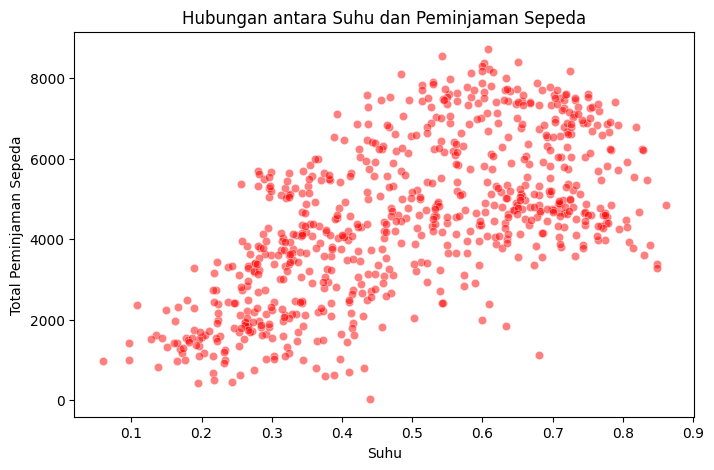

In [17]:
# Visualisasi 4: Hubungan antara suhu dan jumlah peminjaman sepeda
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='cnt', data=day, alpha=0.5, color='r')
plt.xlabel("Suhu")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Hubungan antara Suhu dan Peminjaman Sepeda")
plt.show()

**Insight:**
- Mengetahui Preferensi Pengguna Berdasarkan Suhu

Jika peminjaman meningkat saat suhu tertentu, maka operator bisa mengantisipasi lonjakan permintaan pada suhu yang nyaman bagi pengguna. Sementara jika peminjaman menurun drastis saat suhu terlalu tinggi atau rendah, bisa dievaluasi apakah kenyamanan pengguna berkurang karena kondisi ekstrem.

## Conclusion

- Kesimpulan pertanyaan 1 : Dari hasil analisis dan visualisasi bar chart mengenai pengaruh musim terhadap peminjaman sepeda, terlihat bahwa jumlah peminjaman sepeda bervariasi di setiap musim.

- Kesimpulan pertanyaan 2 : Peminjaman sepeda meningkat tajam pada pagi hari (sekitar pukul 7-9) yang mana kemungkinan besar disebabkan oleh pengguna yang berangkat bekerja atau sekolah.

- Kesimpulan pertanyaan 3 : Cuaca cerah memiliki jumlah peminjaman tertinggi, menunjukkan bahwa pengguna lebih cenderung bersepeda saat cuaca bagus.

- Kesimpulan pertanyaan 4 : Berdasarkan distribusi histogram peminjaman sepeda harian, maka terlihat bahwa jumlah peminjaman sepeda tidak terdistribusi secara merata.

- Kesimpulan pertanyaan 5 : Dari analisis scatter plot, terlihat adanya pola yang menunjukkan bahwa suhu berpengaruh terhadap jumlah peminjaman sepeda.